## Observations and Insights 

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_df = pd.read_csv(mouse_metadata_path)
study_df = pd.read_csv(study_results_path)

# print(mouse_df.head())
# print(study_df.head())

# Combine the data into a single dataset

td_df = pd.merge(mouse_df, study_df, on = "Mouse ID")

# Display the data table for preview

td_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [30]:
# Checking the number of mice.
mice = td_df["Mouse ID"].unique()
len(mice)
# mouse_count = len(mice)
# mouse_count
# mice

249

In [31]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
rows = td_df.loc[td_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
# len(rows)
rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [32]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = {x : y  for x, y in td_df.groupby(['Mouse ID','Timepoint']) if len(y) > 1}
duplicates


{('g989',
  0):     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
 908     g989     Propriva  Female          21          26          0   
 909     g989     Propriva  Female          21          26          0   
 
      Tumor Volume (mm3)  Metastatic Sites  
 908                45.0                 0  
 909                45.0                 0  ,
 ('g989',
  5):     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
 910     g989     Propriva  Female          21          26          5   
 911     g989     Propriva  Female          21          26          5   
 
      Tumor Volume (mm3)  Metastatic Sites  
 910           48.786801                 0  
 911           47.570392                 0  ,
 ('g989',
  10):     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
 912     g989     Propriva  Female          21          26         10   
 913     g989     Propriva  Female          21          26         10   
 
      Tumor Volume 

In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
td_df = td_df[td_df['Mouse ID'] != 'g989']

In [34]:
# Checking the number of mice in the clean DataFrame.
mice = td_df["Mouse ID"].unique()
len(mice)

248

## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
avg = td_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
med = td_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
var = td_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standard_dev = td_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = td_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

stats = {
    "Mean": avg,
    "Median": med,
    "Variance": var,
    "Standard Deviation": standard_dev,
    "SEM": sem
}

stats_df = pd.DataFrame(stats)
stats_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_data = td_df.groupby(['Drug Regimen'])
agg_stats = agg_data['Tumor Volume (mm3)'].agg(['mean','median','std','var','sem'])
agg_stats

,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

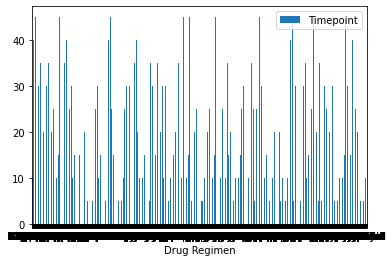

In [37]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# td_df.plot(kind='bar')
# Timepoint


# plt.title("Treatment Count")
# plt.show()
regimen = td_df[["Drug Regimen", "Timepoint"]]
pandas_plot = regimen.plot.bar(x="Drug Regimen", y="Timepoint", rot=0)
pandas_plot

<AxesSubplot:xlabel='Drug Regimen'>

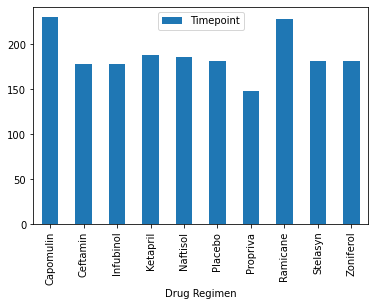

In [38]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
regimen = pd.DataFrame(td_df.groupby(["Drug Regimen"]).count()).reset_index()
drugs_df = regimen[["Drug Regimen", "Timepoint"]]
drugs_df = drugs_df.set_index("Drug Regimen")
drugs_df.plot(kind="bar")


array([<AxesSubplot:ylabel='Sex'>], dtype=object)

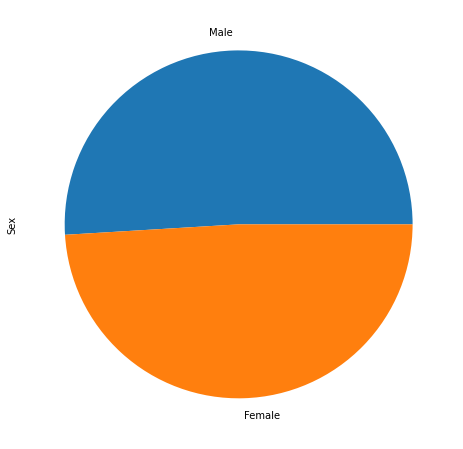

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sexCount = td_df.Sex.value_counts()
sexCount.plot(kind='pie', subplots=True, figsize=(16,8))

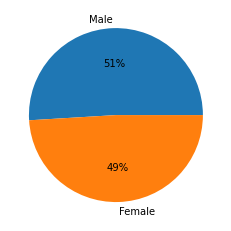

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexLabels = ["Male", "Female"]
plt.pie(sexCount, labels = sexLabels, autopct='%.0f%%')
# plt.pie(y, labels = mylabels)

plt.show()

## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugList = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
drugs = td_df[td_df["Drug Regimen"].isin(drugList)]
maxTumor = drugs.groupby(["Mouse ID", "Drug Regimen"])["Timepoint"].max()
# with pd.option_context('display.max_rows', None,):
#    print(maxTumor)
maxTumor
# drugs

Mouse ID  Drug Regimen
a203      Infubinol       45
a251      Infubinol       45
a275      Ceftamin        45
a411      Ramicane        45
a444      Ramicane        45
                          ..
y769      Ceftamin        45
y793      Capomulin       45
y865      Ceftamin        45
z578      Ramicane        45
z581      Infubinol       45
Name: Timepoint, Length: 100, dtype: int64

In [42]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tx_df = pd.merge(maxTumor , td_df, on=(["Mouse ID","Timepoint"]))
tx_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [53]:
# Put treatments into a list for for loop (and later for plot labels)
tumor_vol_data=[]

for drug in drugs:
    tx_regimen = tx_df.loc[tx_df["Drug Regimen"] == drug]
    tumor_vol= tx_regimen['Tumor Volume (mm3)']
    
#append tumor data to new list 
    tumor_vol_data.append(tumor_vol)

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
